In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.dates as md
from scipy.stats import pearsonr #calculate correlation coefficient
from scipy import stats
import calendar

In [85]:
# datos random

spotify_green = (29/255, 185/255, 84/255, 1)
spotify_black = (25/255, 20/255, 20/255, 1)
spotify_blue = (85/255, 156/255, 242/255, 1)
spotify_purple = (65/255, 0/255, 245/255, 1)
spotify_white = (1,1,1,1)

spotify_palette = [
                spotify_green,
                spotify_black,
                spotify_blue,
                spotify_purple,
                spotify_white
                ]
palette = sns.color_palette(spotify_palette, 5)

aa =  ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration']

In [86]:
def heatmap(df, nombre, vars = aa):
    df = df[vars]
    cormat = df.corr()
    f, ax = plt.subplots(figsize=(10,8))
    sns.heatmap(cormat, vmax= .85, square=True)
    k = 10
    cols = cormat.nlargest(k,vars[2])[vars[2]].index
    cm = np.corrcoef(df[cols].values.T)
    sns.set(font_scale=1.25)
    hm = sns.heatmap(cm, cbar=False, annot=True, square=True, fmt=".2f", annot_kws={"size": 10}, yticklabels=cols.values, xticklabels=cols.values)
    # plt.show()
    plt.savefig(nombre, transparent = False)
    plt.close()

def pairplot(df, vars, nombre):
    sns.pairplot(df[vars]) # ,"valence"
    # plt.show()
    plt.savefig(nombre, transparent = False)
    plt.close()

def histogram(df, var, nombre):
    #set figure
    f, ax = plt.subplots(1,1, figsize = (10,8))#graph histogram
    plt.hist(df[var], bins=10, alpha=0.75, color = spotify_green , label=var.title())
    plt.legend(loc='upper right')#set title & axis titles
    ax.set_title(f'{var.title()} Histogram', fontsize=20)
    ax.set_xlabel(var.title())
    ax.set_ylabel('Frequency')#set x & y ranges
    # plt.xlim(0,1)
    # plt.ylim(0, len())
    # plt.show()
    plt.savefig(nombre, transparent = False)
    plt.close()

def reg_plot(df, var1, var2, nombre):
    f, ax = plt.subplots(figsize=(10,8))
    corr = pearsonr(df[var1], df[var2])
    corr = [np.round(c, 2) for c in corr] #add the coefficient to your graph
    text = 'r=%s' % (corr[0])
    sns.regplot(x=var1, y=var2, data=df, color = spotify_green)
    ax.legend([text])
    plt.savefig(nombre, transparent = False)
    plt.close()

def time_series(data, var, nombre ,trendline = False, rolling_average = False, IC = False,rolling_size = 4, aux = True):
    fig, ax = plt.subplots(figsize = (16,10))
    labels = []
    sns.lineplot(data = data, x = "start", y = var , color = spotify_green)
    labels.append(var)

    if rolling_average:
        data["media_movil"] = data[var].rolling(rolling_size).mean()
        sns.lineplot(data = data, x = "start", y = "media_movil", color = spotify_purple)
        labels.append("Media Móvil")
    if trendline: # como chucha hago la trendlin    
        data["x"] = [i for i in range(len(data))]
        slope, intercept, r_value, pv, se = stats.linregress(data["x"], data[var])
        data["reg"] = data["x"] * slope + intercept
        sns.lineplot(data = data, x = "start", y = "reg", color = spotify_blue)
        labels.append(f"Tendencia, r={r_value:.2f}")
        if IC:
            data["sup"] = data["reg"] + 1.96 * data[var].std()/np.sqrt(len(data[var]))
            data["inf"] = data["reg"] - 1.96 *data[var].std()/np.sqrt(len(data[var]))
            sns.lineplot(data = data, x = "start", y = "sup", color = "red")
            sns.lineplot(data = data, x = "start", y = "inf", color = "red")

    if aux:

        years = md.YearLocator()   # every year
        months = md.MonthLocator()  # every month
        years_fmt = md.DateFormatter('%Y-%m')

        ax.xaxis.set_major_locator(months)
        ax.xaxis.set_major_formatter(years_fmt)
        ax.xaxis.set_minor_locator(months)

    # ax.xaxis.label.set_color(spotify_white)
    # ax.yaxis.label.set_color(spotify_white)
    # ax.tick_params(axis='x', colors=spotify_white)
    # ax.tick_params(axis='y', colors=spotify_white)

    # for _,s in ax.spines.items():
    #     s.set_color(spotify_white)

    plt.xticks(rotation = 'vertical')
    plt.legend(labels=labels)
    # plt.show()
    plt.savefig(nombre, transparent = False)
    plt.close()

def barplot(df, var, nombre = "a"):

    fig, ax = plt.subplots(figsize = (16,10))

    sns.barplot(data = df, x = "start", y = var , color = spotify_green, estimator=np.mean, ci=95,capsize=.2)

    plt.xticks(rotation = 'vertical')
    # plt.legend(labels=labels)
    # plt.show()
    std = df[var].std()
    plt.ylim(min(df[var]-std), max[df[var]]+std)
    plt.savefig(nombre, transparent = False)
    plt.close()

def var_mensual(mensual, n):
    mensual["hue"] = [False]*n + [True]*(12-n)
    a1 = mensual[mensual.hue == False].drop(["start","hue"], axis = 1).transpose().reset_index()
    a2 = mensual[mensual.hue == True].drop(["start","hue"], axis = 1).transpose().reset_index()
    a1 = pd.melt(a1, id_vars='index', value_name='valor').drop(["variable"], axis = 1)
    a2 = pd.melt(a2, id_vars='index', value_name='valor').drop(["variable"], axis = 1)
    a1["periodo"] = "inicio"
    a2["periodo"] = "fin"

    aux = pd.concat([a1,a2], axis = 0)
    aux.columns = ["feature", "valor", "periodo"]

    fig, ax = plt.subplots(figsize = (16,10))
    sns.barplot(x='feature', y='valor', ci = "sd", data=aux, hue = "periodo", palette = [spotify_green, spotify_blue])
    plt.savefig(f"figuras/Primeros {n} meses vs el resto")
    plt.close()

# 1. Importar Datos

In [157]:
df = pd.read_csv("https://raw.githubusercontent.com/PabloReyesPolanco/spotify/master/Spotify%20Weekly.csv")
df = df.drop(["url","time_signature","key","mode"], axis = 1)
df = df[df.year > 2016].dropna(axis = 0).sort_values(["start","position"]).reset_index(drop=True)
df["duration"] = df["duration_ms"]
df['start'] = pd.to_datetime(df['start'], format = '%Y-%m-%d')

semanal = df.groupby("start", as_index = False).agg(
    danceability = ("danceability","mean"),
    energy = ("energy","mean"),
    loudness = ("loudness","mean"),
    speechiness = ("speechiness","mean"),
    acousticness = ("acousticness","mean"),
    instrumentalness = ("instrumentalness","mean"),
    liveness = ("liveness","mean"),
    valence = ("valence","mean"),
    tempo = ("tempo","mean"),
    duration = ("duration","mean"))

# semanal["id"] = [i for i in range(len(semanal))]

mensual = semanal.groupby(semanal['start'].dt.month).mean().reset_index()
mensual['start'] = mensual['start'].apply(lambda x: calendar.month_abbr[x])
aux = mensual.pop("start")
mensual=(mensual-mensual.mean())/mensual.std() # (mensual-mensual.min())/(mensual.max()-mensual.min())
# mensual = (mensual-mensual.max())/(mensual.min()-mensual.max())
mensual.insert(0, "start", aux)


In [155]:
n = 9
mensual["hue"] = [False]*n + [True]*(12-n)
a1 = mensual[mensual.hue == False].drop(["start","hue"], axis = 1).transpose().reset_index()
a2 = mensual[mensual.hue == True].drop(["start","hue"], axis = 1).transpose().reset_index()
a1 = pd.melt(a1, id_vars='index', value_name='valor').drop(["variable"], axis = 1)
a2 = pd.melt(a2, id_vars='index', value_name='valor').drop(["variable"], axis = 1)
a1["periodo"] = "inicio"
a2["periodo"] = "fin"
aux = pd.concat([a1,a2], axis = 0)
aux.columns = ["feature", "valor", "periodo"]

In [89]:
aux_mean = mensual.groupby("hue").mean().transpose().reset_index()
aux_std = mensual.groupby("hue").std().transpose().reset_index().fillna(0)
aux_mean.columns = ["feature", "inicio", "fin"]
aux_std.columns = ["feature", "inicio", "fin"]
# aux = pd.merge(aux_mean, aux_std,how = "inner", on="feature")
# aux

aux_mean = pd.melt(aux_mean, id_vars='feature', value_vars=["inicio","fin"], value_name='valor')
aux_mean.columns = ["feature","periodo","valor"]
aux_std = pd.melt(aux_std, id_vars='feature', value_vars=["inicio","fin"], value_name='valor')
aux_std.columns = ["feature","periodo","valor"]

In [90]:
for i in aa:
    g1 = mensual[mensual.hue == False]
    g2 = mensual[mensual.hue == True]
    g1_n, g2_n = len(g1), len(g2)
    if g2_n != 1:
        g1_mean, g2_mean = g1[i].mean(), g2[i].mean()
        g1_std, g2_std = g1[i].std(), g2[i].std()
    else:
        g1_mean, g2_mean = g1[i].mean(), int(g2[i])
        g1_std, g2_std = g1[i].std(), 0

    dif = g2_mean - g1_mean
    std = (g1_std**2/g1_n + g2_std**2/g2_n)**(1/2)
    intervalo = [dif - 1.96*std,dif +1.96*std]
    if intervalo[0]*intervalo[1] > 0:
        print(f"{i}: ")
        print(intervalo)

danceability: 
[-3.3278614528424004, -0.2037744697127606]
speechiness: 
[-3.2879312949066604, -0.35364977938555264]
tempo: 
[1.511795016775515, 2.3377837555062597]
duration: 
[-2.7845874337330074, -0.8741581950236171]


In [91]:
mean = df.drop_duplicates("track_name").mean()
std = df.drop_duplicates("track_name").std()
std/mean

<ipython-input-91-5a07f1c8fc73>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean = df.drop_duplicates("track_name").mean()


acousticness        1.048899
danceability        0.206647
duration            0.237507
duration_ms         0.237507
energy              0.260291
instrumentalness    6.333953
liveness            0.763157
loudness           -0.403625
position            0.564344
speechiness         0.911765
start                    NaT
streams             0.802342
tempo               0.244375
valence             0.459569
year                  0.0007
dtype: object

In [92]:
for i in aa:
    lenght = len(df)
    print(f"{i}: {len(df[(df[i] > mean[i] - std[i]) & (df[i] < mean[i] + std[i])])*100/lenght:.2f}%")

danceability: 71.12%
energy: 66.35%
loudness: 75.17%
speechiness: 88.05%
acousticness: 81.96%
instrumentalness: 97.45%
liveness: 87.50%
valence: 63.43%
tempo: 67.92%
duration: 81.38%


# Pregunta 3: Efecto Tik Tok

In [160]:
tiktok = pd.read_csv("tiktok.csv").drop(["Unnamed: 0","track_id","artist_id","album_id"], axis =1)
tiktok = tiktok[["track_name"]+aa]
tiktok["plataforma"] = "tiktok"
spotify = df[["track_name"]+aa].copy()
spotify = spotify.drop_duplicates(["track_name"])
spotify["plataforma"] = "spotify"
stream = pd.concat([spotify,tiktok], axis = 0 )

aux = stream.pop("track_name")
aux2 = stream.pop("plataforma")
stream=(stream-stream.max())/(stream.min() -stream.max())# (mensual-mensual.min())/(mensual.max()-mensual.min())
stream.insert(0, "track_name", aux)
stream.insert(0, "plataforma", aux2)

spfy = stream[stream.plataforma == "spotify"]
ttok = stream[stream.plataforma == "tiktok"]
spfy = pd.melt(spfy[aa].transpose().reset_index(), id_vars='index', value_name='valor').drop(["variable"], axis = 1)
ttok = pd.melt(ttok[aa].transpose().reset_index(), id_vars='index', value_name='valor').drop(["variable"], axis = 1)
ttok["plataforma"] = "tiktok"
spfy["plataforma"] = "spotify"
comp = pd.concat([spfy,ttok], axis = 0)
comp.columns = ["feature", "valor", "plataforma"]


## Diferencia de medias entre los promedios de tik tok y los de spotify

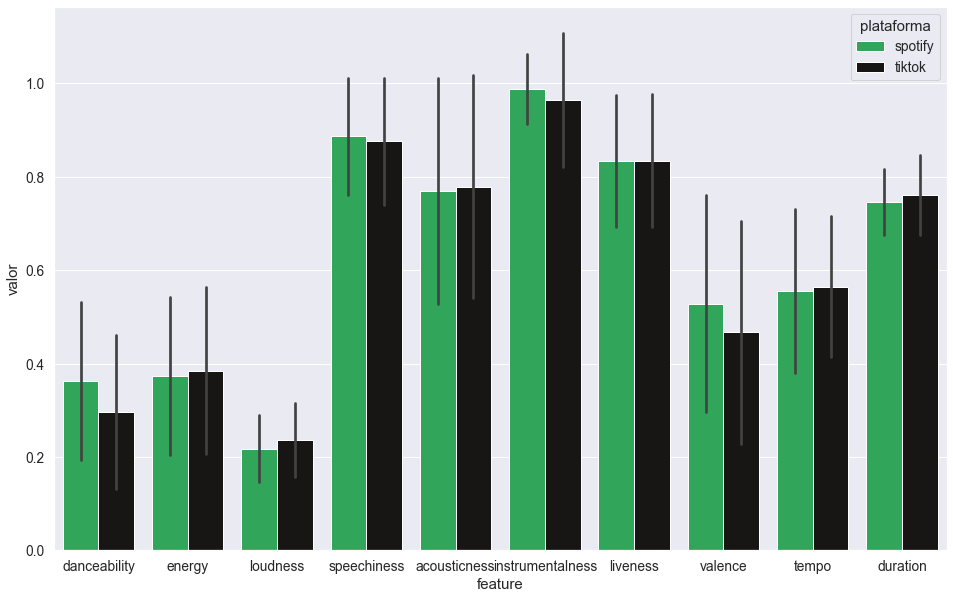

In [162]:
fig, ax = plt.subplots(figsize = (16,10))
sns.barplot(x='feature', y='valor', ci = "sd", data=comp, hue = "plataforma", palette = [spotify_green, spotify_black])
plt.savefig(f"figuras/spotify vs tiktok")
# plt.close()

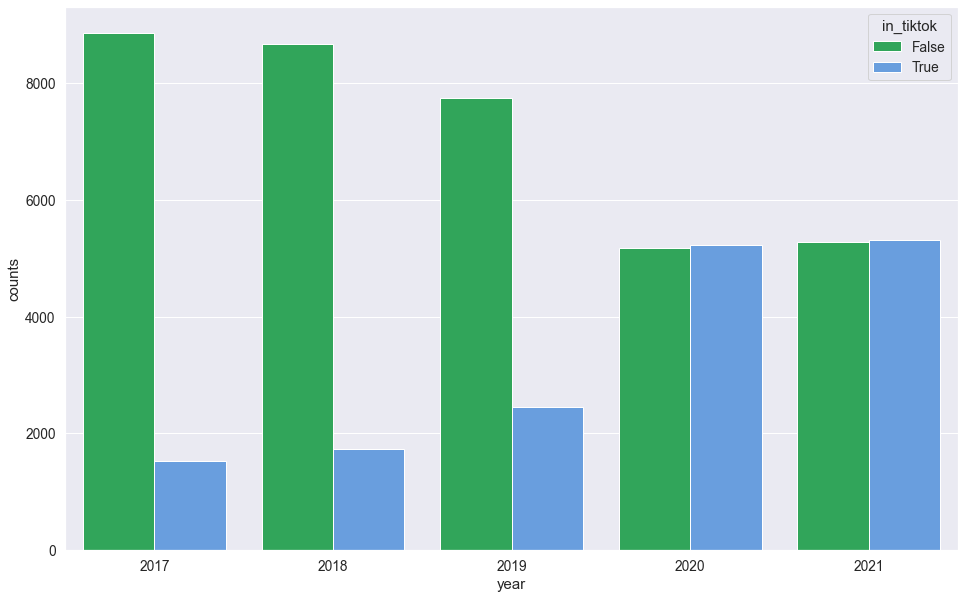

In [207]:
df["in_tiktok"] = df.track_name.apply(lambda x: True if x in tiktok.track_name.values else False)
in_tiktok = df.groupby(["year", "in_tiktok"]).size().to_frame().reset_index()
in_tiktok.columns = ["year", "in_tiktok", "counts"]
fig, ax = plt.subplots(figsize = (16,10))
sns.barplot(x = "year", y = "counts" , hue = "in_tiktok", data = in_tiktok, palette = [spotify_green, spotify_blue])
plt.savefig(f"figuras/canciones en tik tok")

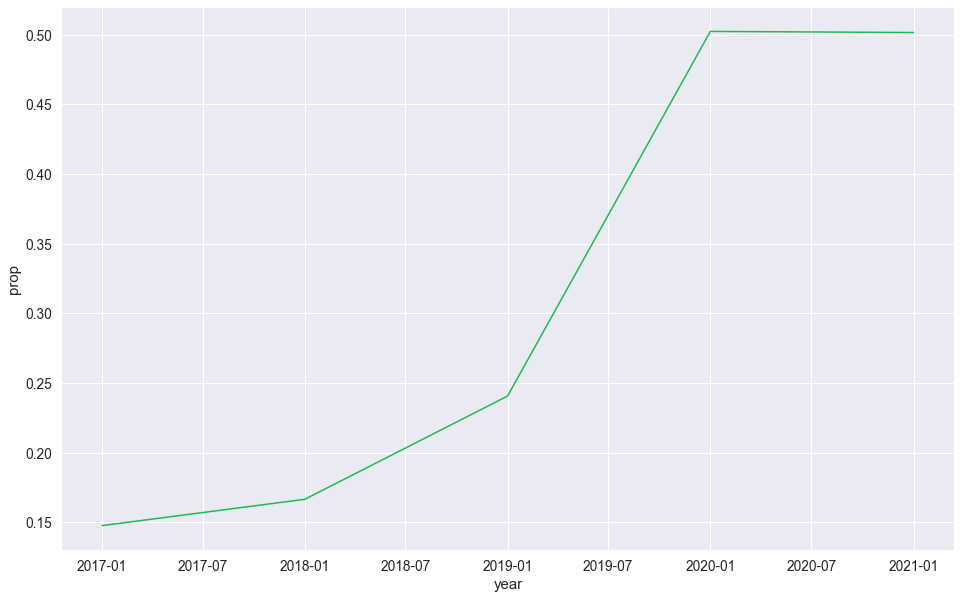

In [214]:
# proporcion en tik tok
prop = in_tiktok[in_tiktok.in_tiktok == True].copy()
prop["total"] = in_tiktok[in_tiktok.in_tiktok == False].counts.to_list()
prop["total"] = prop["total"] + prop["counts"]
prop["prop"] = prop["counts"]/prop["total"]
fig, ax = plt.subplots(figsize = (16,10))
prop['year'] = pd.to_datetime(prop['year'], format = '%Y')
sns.lineplot(x = "year", y = "prop", data = prop, color = spotify_green)
plt.savefig(f"figuras/proporcion en tik tok")

In [223]:
pd.merge(tiktok.drop_duplicates("track_name"), df[["track_name", "streams"]],how = "inner", on="track_name").sort_values("streams", ascending = False)

,track_name,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,plataforma,streams
5244,good 4 u,0.556,0.661,-5.052,0.2040,0.3000,0.000000,0.1010,0.668,168.560,178147,tiktok,84131760
998,drivers license,0.585,0.436,-8.761,0.0601,0.7210,0.000013,0.1050,0.132,143.874,242013,tiktok,80764045
5245,good 4 u,0.556,0.661,-5.052,0.2040,0.3000,0.000000,0.1010,0.668,168.560,178147,tiktok,77001868
5246,good 4 u,0.556,0.661,-5.052,0.2040,0.3000,0.000000,0.1010,0.668,168.560,178147,tiktok,68911998
7688,In My Feelings,0.885,0.853,-4.556,0.2540,0.0475,0.000006,0.1010,0.855,91.027,179340,tiktok,67499798
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8835,Secrets,0.848,0.768,-5.386,0.0373,0.0412,0.000785,0.1950,0.777,118.961,176766,tiktok,2619942
11086,goosebumps,0.841,0.728,-3.370,0.0484,0.0847,0.000000,0.1490,0.430,130.049,243836,tiktok,2619064
9238,Mr. Brightside,0.550,0.865,-3.783,0.0725,0.0540,0.000000,0.0859,0.246,126.093,226666,tiktok,2605389
11703,Famous,0.838,0.624,-5.674,0.0470,0.1470,0.000019,0.1050,0.520,109.998,204300,tiktok,2580512


# Información Útil
* [Seaborn bonito](https://www.codecademy.com/article/seaborn-design-i)
* [Gráficos con barra de error](https://stackoverflow.com/questions/43159528/error-bars-with-seaborn-and-stripplot)
* [¿Cuándo una desviación estandar es pequeña?](https://math.stackexchange.com/questions/260617/how-to-determine-if-standard-deviation-is-high-low)

In [ ]:
n = 9
mensual["hue"] = [False]*n + [True]*(12-n)
a1 = mensual[mensual.hue == False].drop(["start","hue"], axis = 1).transpose().reset_index()
a2 = mensual[mensual.hue == True].drop(["start","hue"], axis = 1).transpose().reset_index()
a1 = pd.melt(a1, id_vars='index', value_name='valor').drop(["variable"], axis = 1)
a2 = pd.melt(a2, id_vars='index', value_name='valor').drop(["variable"], axis = 1)
a1["periodo"] = "inicio"
a2["periodo"] = "fin"
aux = pd.concat([a1,a2], axis = 0)
aux.columns = ["feature", "valor", "periodo"]